In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


[[-0.28930742]
 [-0.58880963]
 [ 1.02750749]
 ...
 [-0.30516366]
 [ 1.67583291]
 [-0.49175724]]


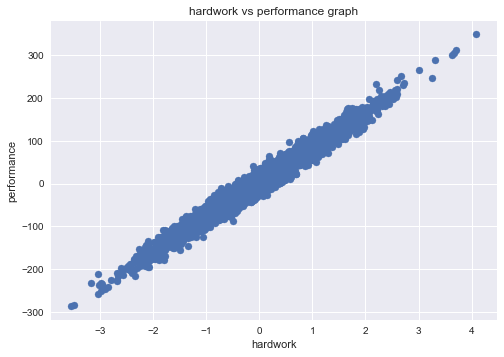

[[-0.25352061]
 [-0.55541377]
 [ 1.07380656]
 ...
 [-0.26950343]
 [ 1.72730762]
 [-0.4575866 ]]


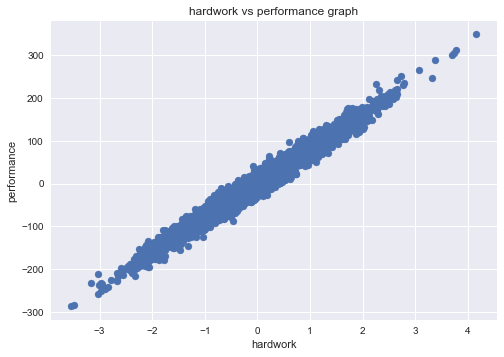

In [45]:
#load
x=pd.read_csv('./Linear_X_Train.csv')
y=pd.read_csv('./Linear_Y_Train.csv')

#convert X,Y to numpy array
x=x.values
Y=y.values
print(x)
#normalization
plt.style.use("seaborn")
plt.scatter(x,Y)
plt.title('hardwork vs performance graph')
plt.xlabel('hardwork')
plt.ylabel('performance')
plt.show()
X=(x-x.mean())/x.std()
print(X)
#visualise
plt.style.use("seaborn")
plt.scatter(X,Y)
plt.title('hardwork vs performance graph')
plt.xlabel('hardwork')
plt.ylabel('performance')
plt.show()

# Linear Regression

In [4]:
def hypothesis(x,theta):                         
    y_=theta[0]+theta[1]*x
    return y_


def gradient(X,Y,theta):
    m=X.shape[0]
    grad=np.zeros(2,)
    for i in range(m):
        x=X[i]
        y_=hypothesis(x,theta)
        y=Y[i]
        grad[0]+=(y_ - y)
        grad[1]+=(y_ - y)*x
        
    return grad/m
def error(X,Y,theta):
    m=X.shape[0]
    total_error=0.0
    for i in range(m):
        y_=hypothesis(X[i],theta)
        total_error+=(y_ - Y[i])**2
    return total_error/m

def gradientDescent(X,Y,max_steps=100,learning_rate=0.1):
    theta = np.zeros((2,))
    error_list=[]
    for i in range(max_steps):
        #compute grad
        grad=gradient(X,Y,theta)
        e=error(X,Y,theta)
        error_list.append(e)
        
        #update theta
        theta[0]=theta[0]-learning_rate*grad[0]
        theta[1]=theta[1]-learning_rate*grad[1]
        #print(theta[0],theta[1])
    
    return theta,error_list

In [36]:
theta,error_list=gradientDescent(X,Y)
theta

array([ 0.6838508 , 79.90361453])

[array([6576.35005246]), array([5363.12510257]), array([4380.41289317]), array([3584.41600355]), array([2939.65852295]), array([2417.40496367]), array([1994.37958066]), array([1651.72902041]), array([1374.18206661]), array([1149.36903404]), array([967.27047765]), array([819.77064698]), array([700.29578413]), array([603.52114523]), array([525.13368772]), array([461.63984713]), array([410.20983626]), array([368.55152745]), array([334.80829731]), array([307.47628091]), array([285.33734761]), array([267.40481165]), array([252.87945752]), array([241.11392067]), array([231.58383582]), array([223.8644671]), array([217.61177843]), array([212.54710061]), array([208.44471157]), array([205.12177646]), array([202.43019901]), array([200.25002128]), array([198.48407732]), array([197.05366271]), array([195.89502687]), array([194.95653185]), array([194.19635088]), array([193.58060429]), array([193.08184956]), array([192.67785822]), array([192.35062524]), array([192.08556653]), array([191.87086897]), a

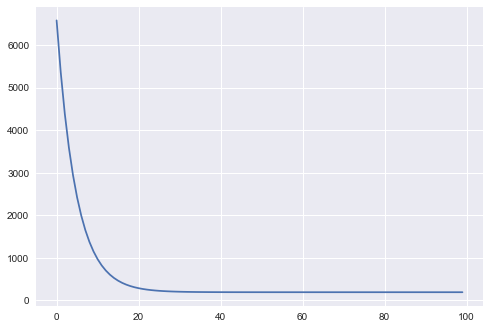

In [31]:
print(error_list)
plt.plot(error_list)

In [40]:
y_=hypothesis(X,theta)

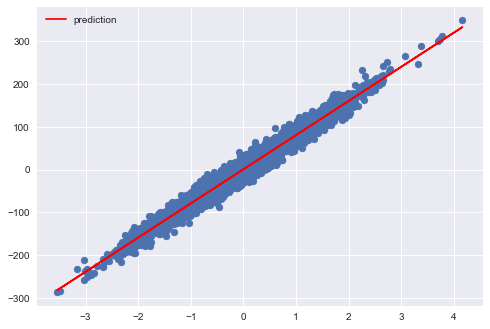

In [41]:
plt.scatter(X,Y)
plt.plot(X,y_,color="red",label="prediction")
plt.legend()
plt.show()

In [37]:
X_test=pd.read_csv('./Linear_X_Test.csv').values
y_test=hypothesis(X_test,theta)
df=pd.DataFrame(data=y_test,columns=["y"])
df.to_csv('y_prediction.csv',index=False)
